### **Challenge 1: Unscaled features**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/RitikOnTheRoad/PCA/refs/heads/main/Practice/customer_wellness_data.csv")

In [3]:
data.head()

,age,resting_heart_rate,cholesterol_mg_dl,weight_kg,height_cm,daily_steps,water_intake_liters,alcohol_units_weekly,sleep_hours,smoking_frequency
0,56,69.803281,204.540694,68.081236,177.216721,14580.797278,1.651348,4,4.983828,0
1,69,75.571126,226.485227,55.666893,158.709482,5407.393681,1.650742,3,4.595109,20
2,46,86.778940,263.440673,45.903305,164.754797,5531.681672,1.678365,8,7.371268,0
3,32,66.817298,150.487380,73.051955,174.893746,10132.482631,4.076748,6,7.225608,0
4,60,63.915064,285.321335,58.654739,157.778722,9045.674469,2.381935,6,7.150780,0


In [4]:
print(data.alcohol_units_weekly.value_counts())
print(data.smoking_frequency.value_counts())

alcohol_units_weekly
5     36
4     35
6     28
7     22
3     20
8     17
2     16
1     12
10     5
9      5
0      3
12     1
Name: count, dtype: int64
smoking_frequency
0     164
10     12
5      12
20      8
30      4
Name: count, dtype: int64


In [5]:
# alcohol_units_weekly ad smoking_frequecy are descrete numerical features with meaningful mean and varince.
# We have to be cautious while using PCA with odinal data.

## ***PCA without scaling***

In [6]:
# PCA assumes the features to be on same scale. If some features are on different scales PCA might favour feature with larger scale
# Even though the variance remains same pre or post scaling but the numeric values of different might create a bias.
# Example variance of 1000cm vs 5km. Just because the numeric value is large PCA might give unbiased results.

In [7]:
np.mean(data,axis=0)

,0
age,49.005000
resting_heart_rate,72.247948
cholesterol_mg_dl,202.467442
weight_kg,69.319319
height_cm,170.465053
daily_steps,7449.012135
water_intake_liters,2.116418
alcohol_units_weekly,4.945000
sleep_hours,6.977217
smoking_frequency,2.300000


In [29]:
array=data.to_numpy()
col_mean=np.mean(array,axis=0)

In [30]:
array=array-col_mean
array

array([[ 6.99500000e+00, -2.44466640e+00,  2.07325146e+00, ...,
        -9.45000000e-01, -1.99338855e+00, -2.30000000e+00],
       [ 1.99950000e+01,  3.32317819e+00,  2.40177846e+01, ...,
        -1.94500000e+00, -2.38210755e+00,  1.77000000e+01],
       [-3.00500000e+00,  1.45309929e+01,  6.09732303e+01, ...,
         3.05500000e+00,  3.94051029e-01, -2.30000000e+00],
       ...,
       [ 2.89950000e+01, -6.25011630e+00,  9.98256383e+00, ...,
         1.05500000e+00,  6.53461870e-01, -2.30000000e+00],
       [-5.00000000e-03,  4.50073326e-01,  9.75325577e+01, ...,
        -2.94500000e+00, -1.27380345e+00,  2.70000000e+00],
       [-2.80050000e+01, -4.10108349e+00,  4.23155541e+01, ...,
        -9.45000000e-01, -1.88608717e-01, -2.30000000e+00]])

In [10]:
from sklearn.decomposition import PCA

In [31]:
pca=PCA()

In [32]:
pca.fit(array)

PCA()

In [33]:
pca.explained_variance_ratio_

array([9.99728170e-01, 1.78803235e-04, 4.06584678e-05, 2.62956127e-05,
       1.09566592e-05, 9.85550679e-06, 4.27470806e-06, 6.18668769e-07,
       2.52471778e-07, 1.14852896e-07])

In [34]:
weights_df=pd.DataFrame(pca.components_,columns=data.columns.values)
weights_df

,age,resting_heart_rate,cholesterol_mg_dl,weight_kg,height_cm,daily_steps,water_intake_liters,alcohol_units_weekly,sleep_hours,smoking_frequency
0,-0.001128,0.000044,-0.000355,-0.000066,0.000490,0.999999,0.000028,-0.000051,-0.000091,-0.000277
1,-0.057280,-0.007812,0.998234,0.007674,-0.005496,0.000295,0.000774,-0.005478,-0.002893,0.007701
2,0.991737,-0.058352,0.055840,0.065680,-0.068524,0.001172,0.003457,0.006801,0.004604,-0.029065
3,-0.063241,-0.138350,-0.011418,0.978826,0.135528,-0.000073,-0.001839,-0.006615,0.011012,-0.009687
4,0.023073,0.942417,0.006114,0.173690,-0.282821,0.000129,-0.002671,0.011669,-0.000059,-0.031317
5,0.088068,0.297480,0.013193,-0.082853,0.946549,-0.000372,0.000539,0.019772,0.000685,0.019066
6,0.027589,0.020285,-0.006195,0.018914,-0.027881,0.000317,-0.005118,0.029410,-0.036690,0.997706
7,-0.010108,-0.018150,0.004684,0.005808,-0.013063,0.000033,0.007416,0.997084,-0.064164,-0.031511
8,-0.003761,0.001220,0.002822,-0.009941,-0.003735,0.000102,0.006314,0.065207,0.997171,0.034961
9,-0.003247,0.002541,-0.001062,0.002192,-0.000798,-0.000032,0.999928,-0.007667,-0.006002,0.005102


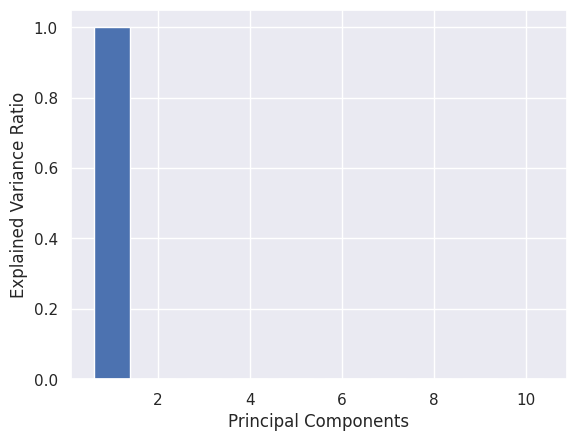

In [36]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()

In [17]:
#clealry the features with higher range or numerical values are given more weights when applying pca without scaling.
#The variance in the variable daily_steps would be numarically more than other features and pca misinterpreted that feature as most important.


# **PCA with scaling**

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
stScaler=StandardScaler()
X=stScaler.fit_transform(data)

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA()

In [37]:
pca.fit(X)

PCA()

In [38]:
pca.explained_variance_

array([1.40418477, 1.28109125, 1.1648271 , 1.11517131, 1.05711385,
       0.93677418, 0.87252066, 0.80609533, 0.75617431, 0.65629852])

In [24]:
pca.components_ #each row is an eigenvector

array([[-0.53986628,  0.10859921,  0.15157918, -0.10097985,  0.34090865,
         0.58252694,  0.08454988, -0.12471242, -0.43010029,  0.01824746],
       [ 0.01102936, -0.4059334 , -0.02055484,  0.54629711,  0.34752036,
         0.18472179,  0.0905241 , -0.3186089 ,  0.3683298 , -0.36873808],
       [-0.19461359, -0.31834877,  0.53301086,  0.23792697, -0.0017147 ,
        -0.31511331, -0.26276566, -0.22373693, -0.09609968,  0.54076917],
       [-0.03030314, -0.01180593, -0.40385818,  0.27284499,  0.51916109,
        -0.05061637, -0.26630259,  0.55666014, -0.02822361,  0.32821046],
       [ 0.35633644, -0.43321736,  0.12421706,  0.02564226,  0.01844889,
         0.086076  ,  0.66687191,  0.27993101, -0.33052882,  0.17082564],
       [-0.20378733,  0.49352576,  0.39634605,  0.1121936 ,  0.23567686,
        -0.22644201,  0.47456731,  0.21656357,  0.40598499,  0.03831656],
       [ 0.21967499,  0.16265348,  0.47131027,  0.36736925, -0.12708953,
         0.11237197, -0.32594206,  0.3918499 

In [25]:
pca.explained_variance_ratio_

array([0.13971638, 0.12746858, 0.1159003 , 0.11095955, 0.10518283,
       0.09320903, 0.08681581, 0.08020649, 0.07523934, 0.0653017 ])

In [26]:
np.cumsum(pca.explained_variance_ratio_)

array([0.13971638, 0.26718496, 0.38308526, 0.49404481, 0.59922763,
       0.69243666, 0.77925247, 0.85945895, 0.9346983 , 1.        ])

In [27]:
new_weights_df=pd.DataFrame(pca.components_[0:2],columns=data.columns.values)
new_weights_df

,age,resting_heart_rate,cholesterol_mg_dl,weight_kg,height_cm,daily_steps,water_intake_liters,alcohol_units_weekly,sleep_hours,smoking_frequency
0,-0.539866,0.108599,0.151579,-0.100980,0.340909,0.582527,0.084550,-0.124712,-0.43010,0.018247
1,0.011029,-0.405933,-0.020555,0.546297,0.347520,0.184722,0.090524,-0.318609,0.36833,-0.368738


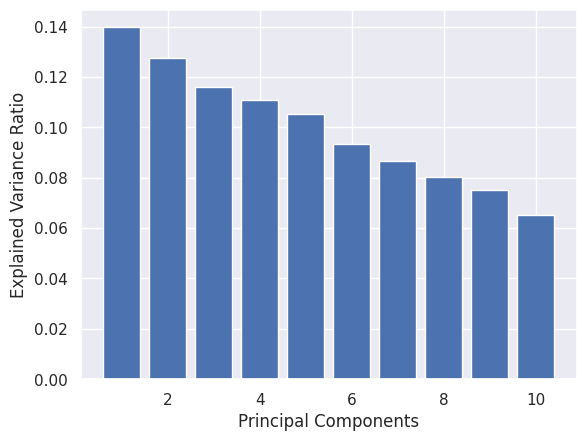

In [39]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.show()